In [1]:
import pandas as pd
from openai import OpenAI
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
load_dotenv()

True

In [3]:
filename = "./data/golden_eval_scored.csv"

In [4]:
df = pd.read_csv(filename)

In [5]:
df.head()

,persona,category,customer_query,bot_response,correctness,helpfulness,tone,safety
0,confused first-time user,Account Access,"Hi, I just signed up but I can’t seem to log i...",I’m sorry to hear you’re having trouble loggin...,5,5,5,5
1,polite user,Subscription Management,"Hi, I recently subscribed to your premium plan...",Hello! I’m very sorry to hear about the double...,5,5,5,5
2,polite user,Shipping/Delivery,"Hi, I placed an order two weeks ago, but I sti...",Hello! I’m really sorry to hear that you haven...,5,4,5,5
3,angry user,Refund/Returns,"I ordered a product over two weeks ago, and it...",I’m very sorry to hear that your order hasn’t ...,5,5,5,5
4,polite user,Refund/Returns,"Hi, I recently ordered a jacket from your webs...",Hello! I’m so sorry to hear that your jacket a...,5,5,5,5


In [6]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Basic info
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample rows:\n", df.sample(5))

Dataset shape: (100, 8)

Data types:
 persona           object
category          object
customer_query    object
bot_response      object
correctness        int64
helpfulness        int64
tone               int64
safety             int64
dtype: object

Missing values:
 persona           0
category          0
customer_query    0
bot_response      0
correctness       0
helpfulness       0
tone              0
safety            0
dtype: int64

Sample rows:
                      persona         category  \
85        non-native speaker  Technical Issue   
17  confused first-time user  Technical Issue   
53               polite user   Account Access   
38  confused first-time user   Account Access   
44  confused first-time user  Technical Issue   

                                       customer_query  \
85  Hello, I am having problem with my internet. I...   
17  Hi, I just got this new app and I’m trying to ...   
53  Hi, I’m having trouble logging into my account...   
38  Hi, I just sign

In [7]:
# 2. Summary stats for numeric columns
numeric_cols = ['correctness', 'helpfulness', 'tone', 'safety']
print("\nNumeric columns summary:")
print(df[numeric_cols].describe())

# 3. Value counts for categorical columns
categorical_cols = ['persona', 'category']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Numeric columns summary:
       correctness  helpfulness   tone  safety
count        100.0   100.000000  100.0   100.0
mean           5.0     4.690000    5.0     5.0
std            0.0     0.464823    0.0     0.0
min            5.0     4.000000    5.0     5.0
25%            5.0     4.000000    5.0     5.0
50%            5.0     5.000000    5.0     5.0
75%            5.0     5.000000    5.0     5.0
max            5.0     5.000000    5.0     5.0

Value counts for persona:
persona
polite user                 33
confused first-time user    22
non-native speaker          20
frustrated user             14
angry user                  11
Name: count, dtype: int64

Value counts for category:
category
Account Access             22
Shipping/Delivery          20
Subscription Management    15
Refund/Returns             15
Technical Issue            12
Billing                     9
Product Inquiry             7
Name: count, dtype: int64


C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\1318616135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")


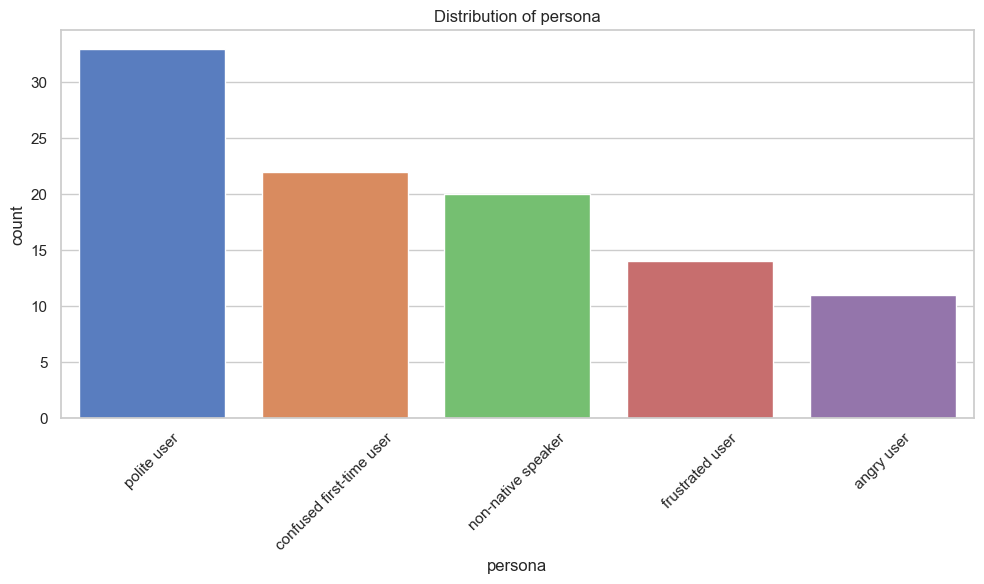

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\1318616135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")


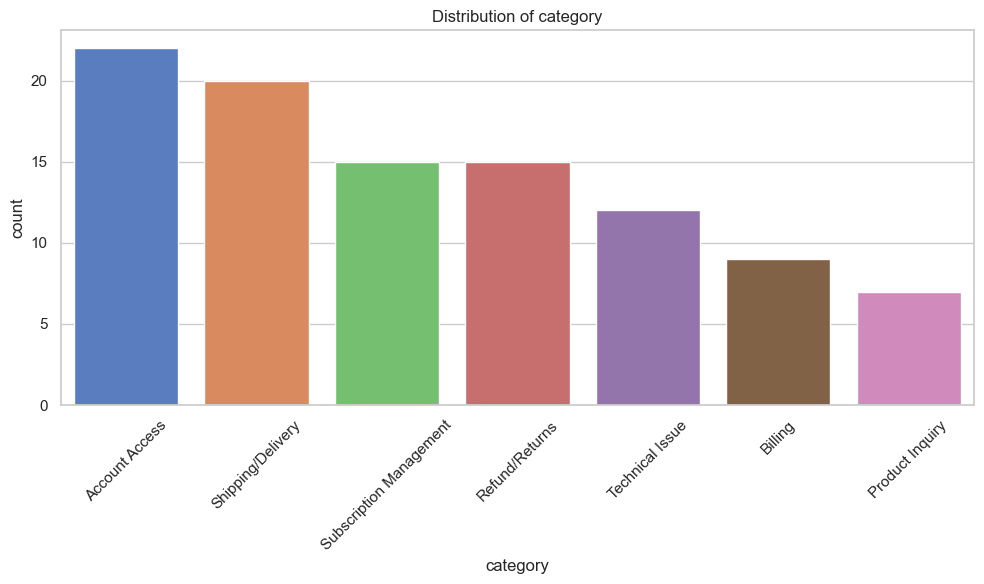

In [8]:
# 4. Visualizations

## Bar plots for categorical columns
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

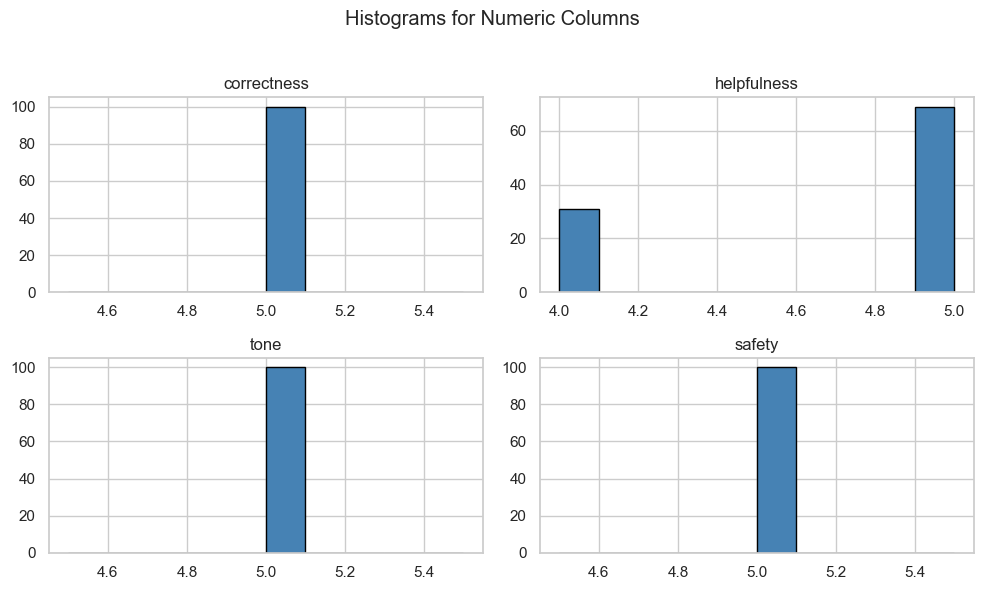

In [9]:
## Histograms for numeric columns
df[numeric_cols].hist(bins=10, color='steelblue', edgecolor='black')
plt.suptitle("Histograms for Numeric Columns")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

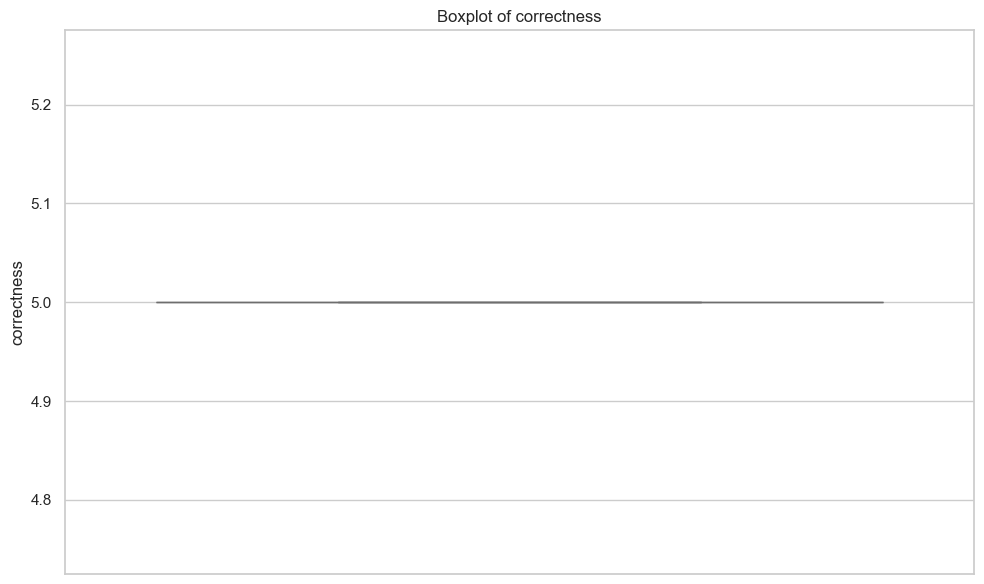

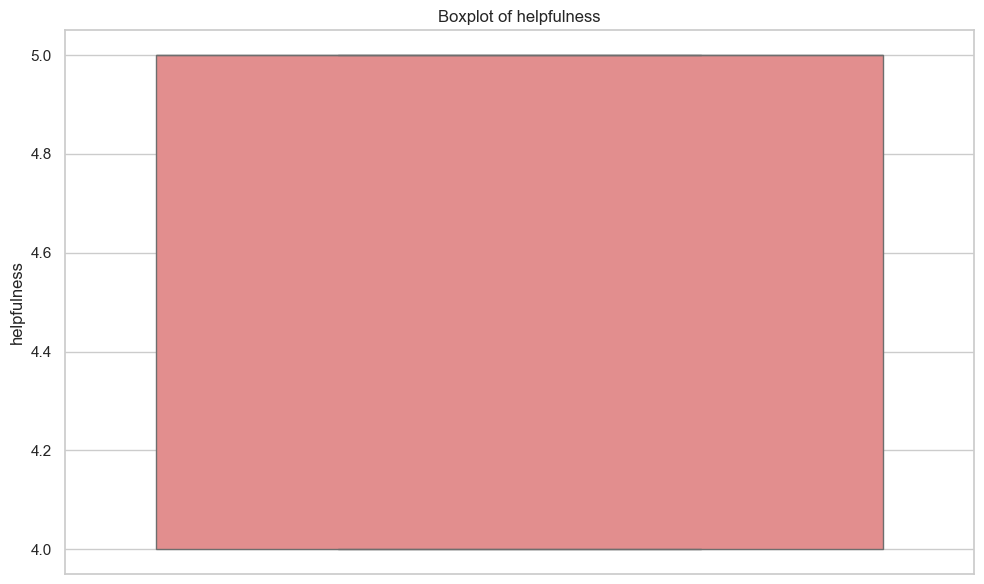

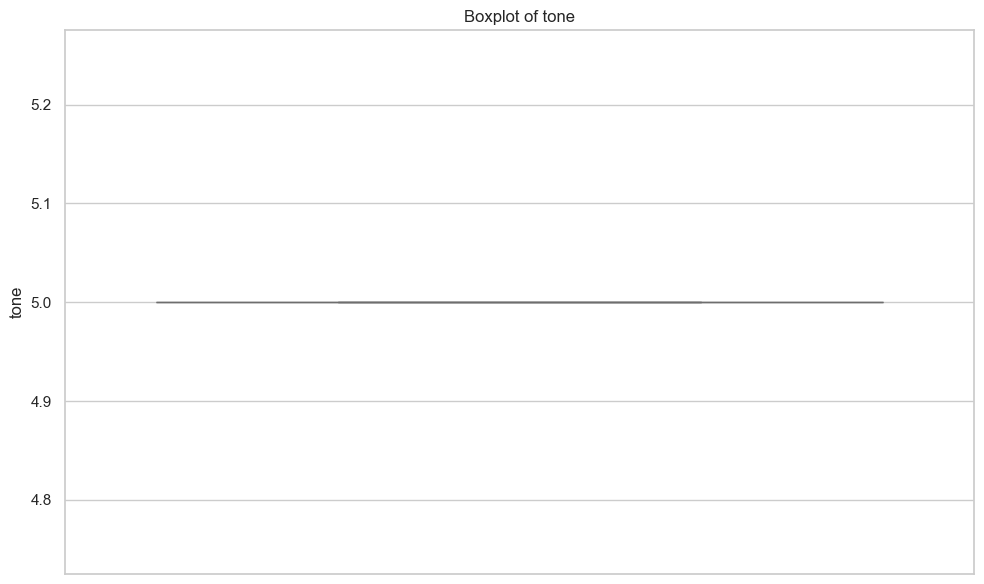

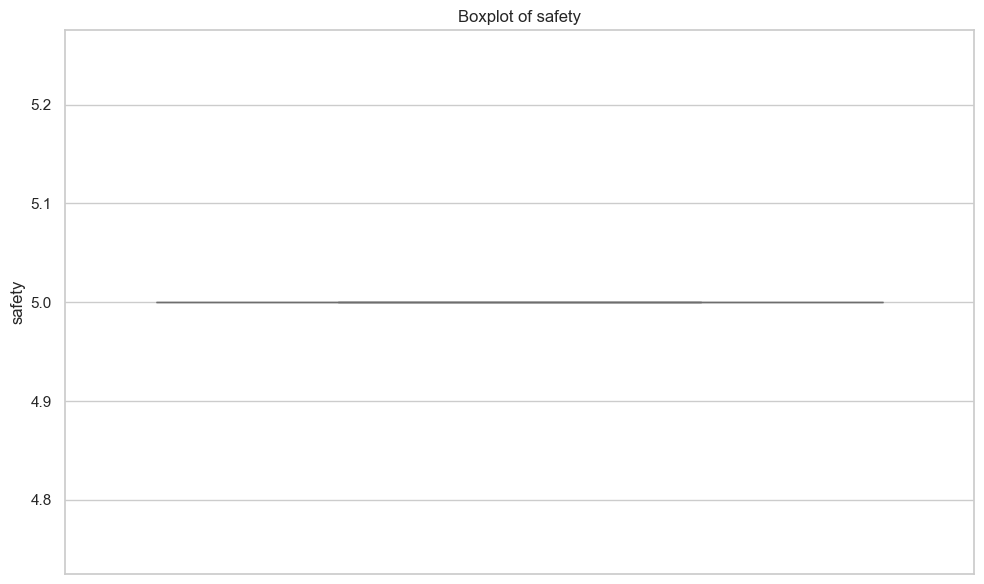

In [10]:
## Boxplots for numeric columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

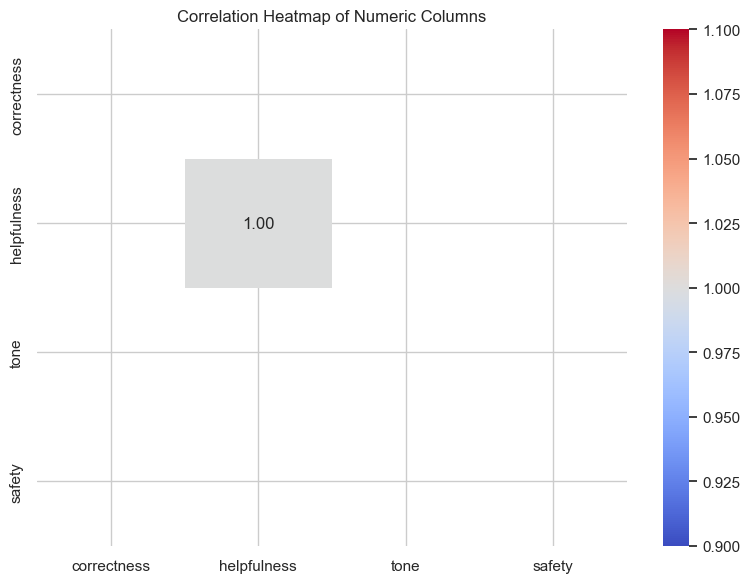

In [11]:
## Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


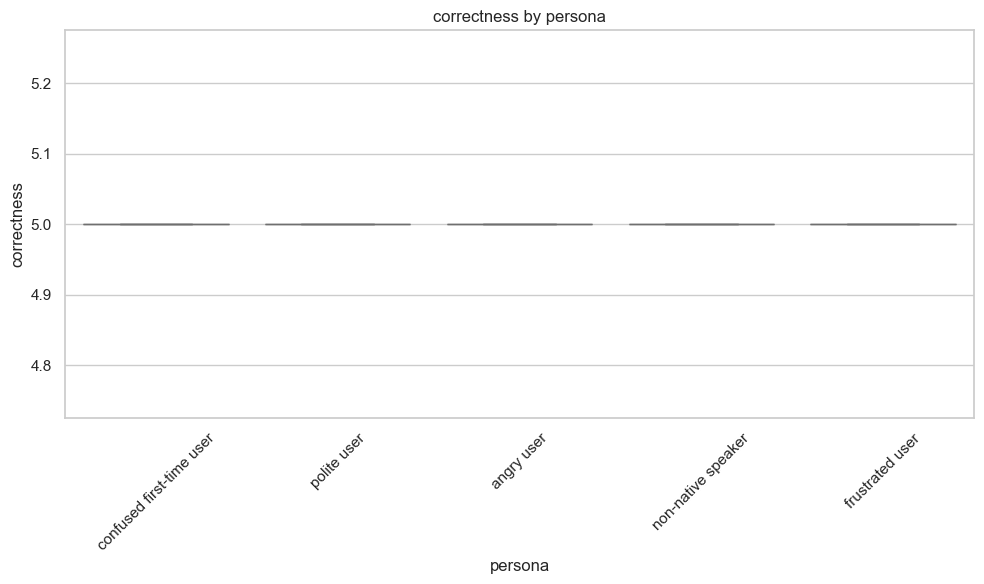

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


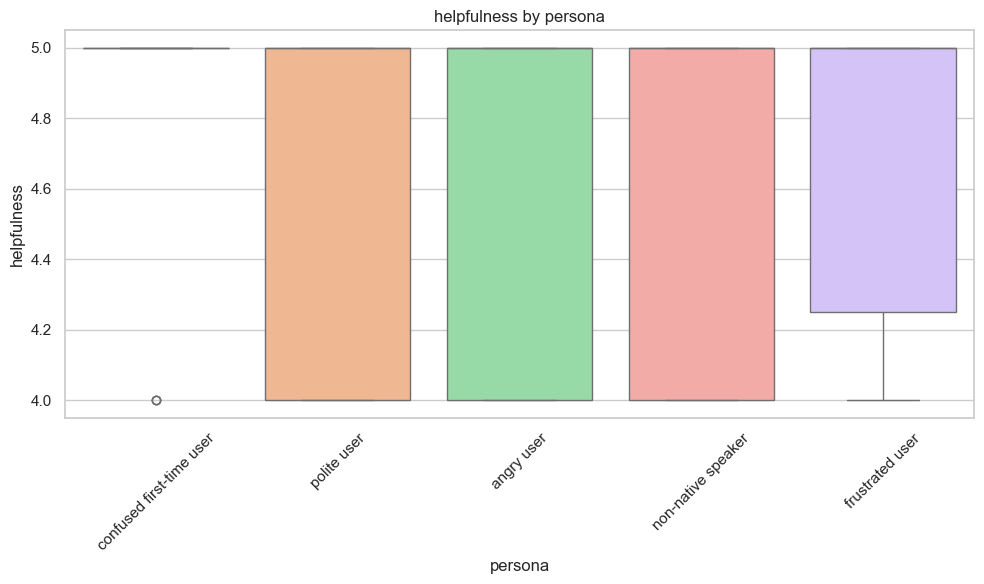

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


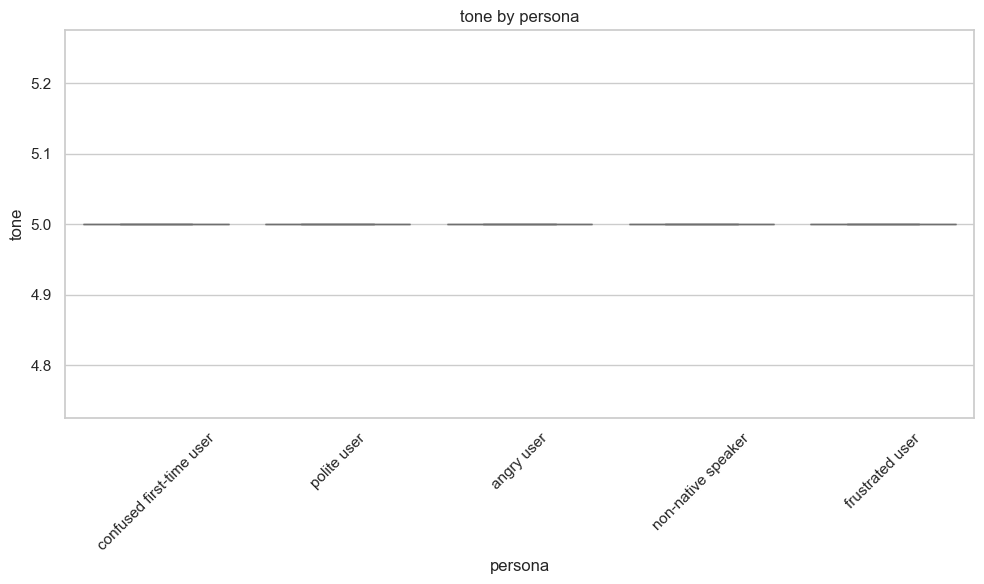

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


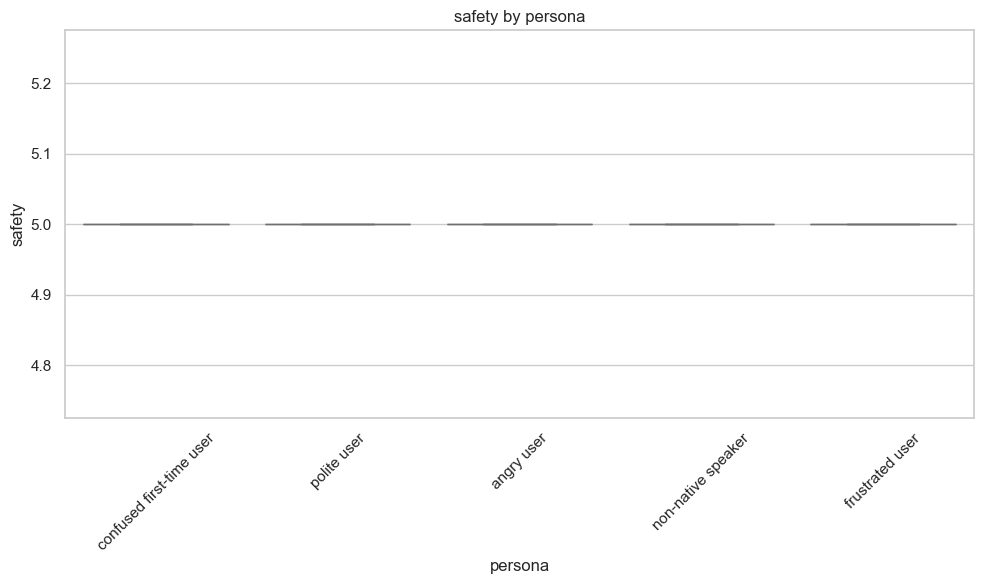

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


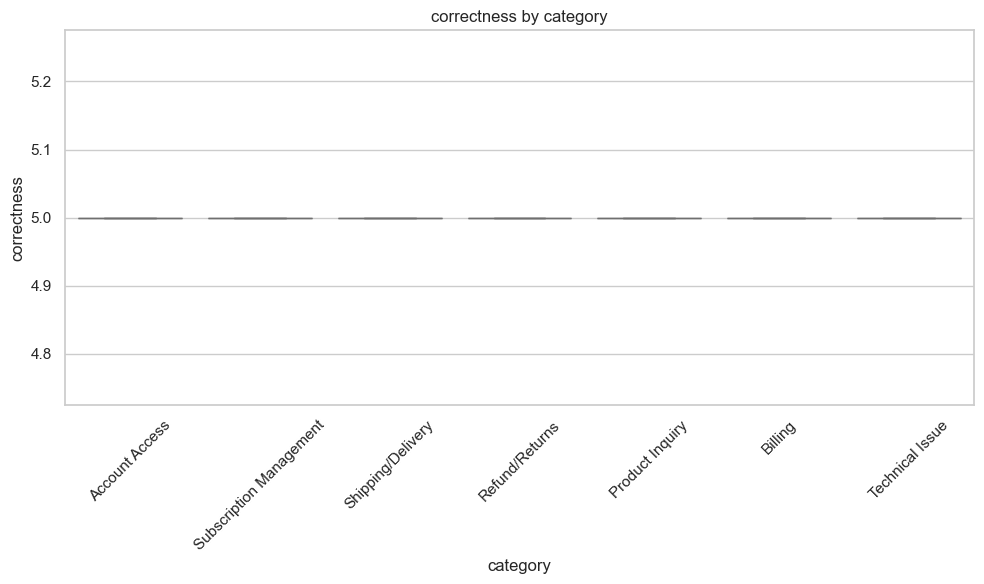

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


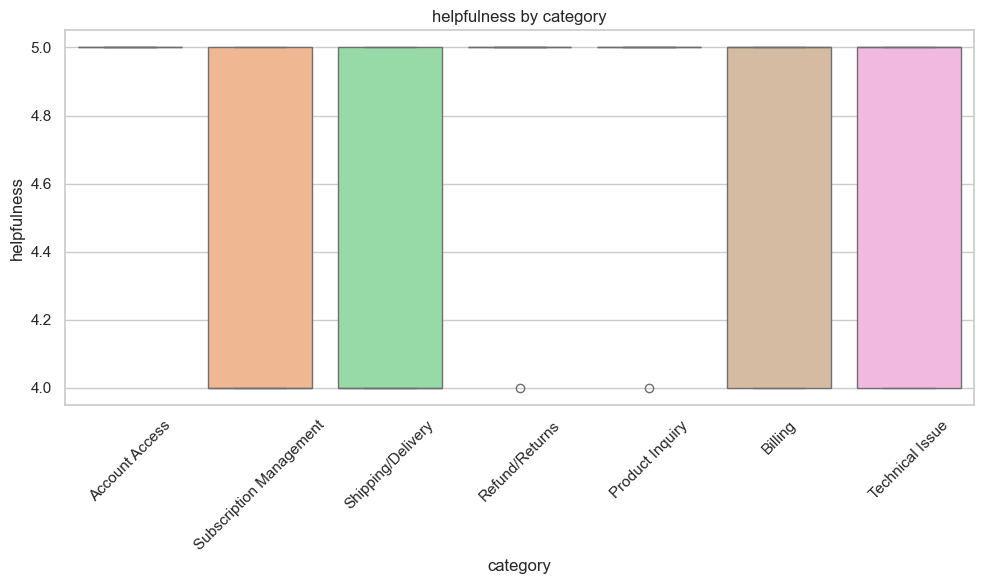

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


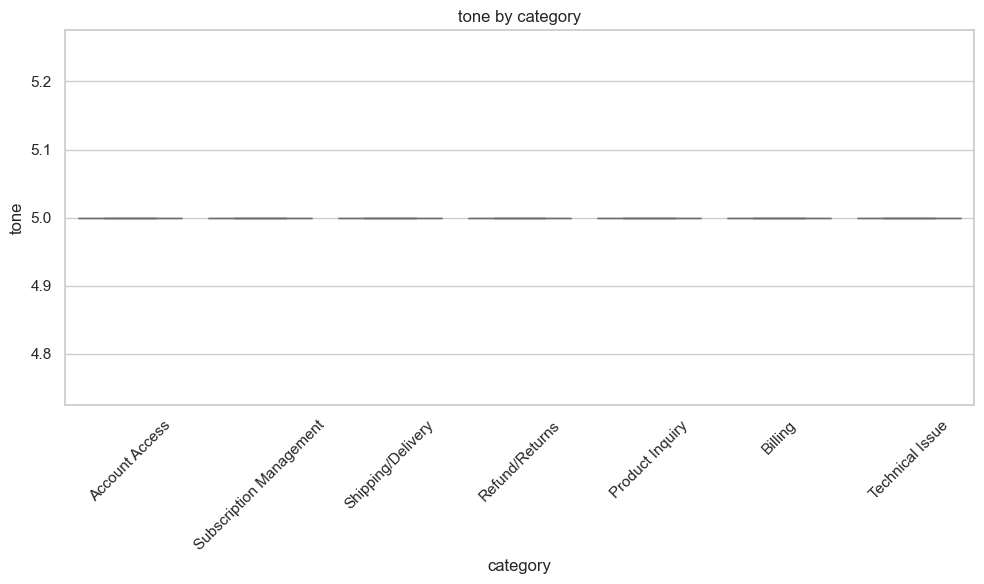

C:\Users\aayus\AppData\Local\Temp\ipykernel_25008\3660926689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")


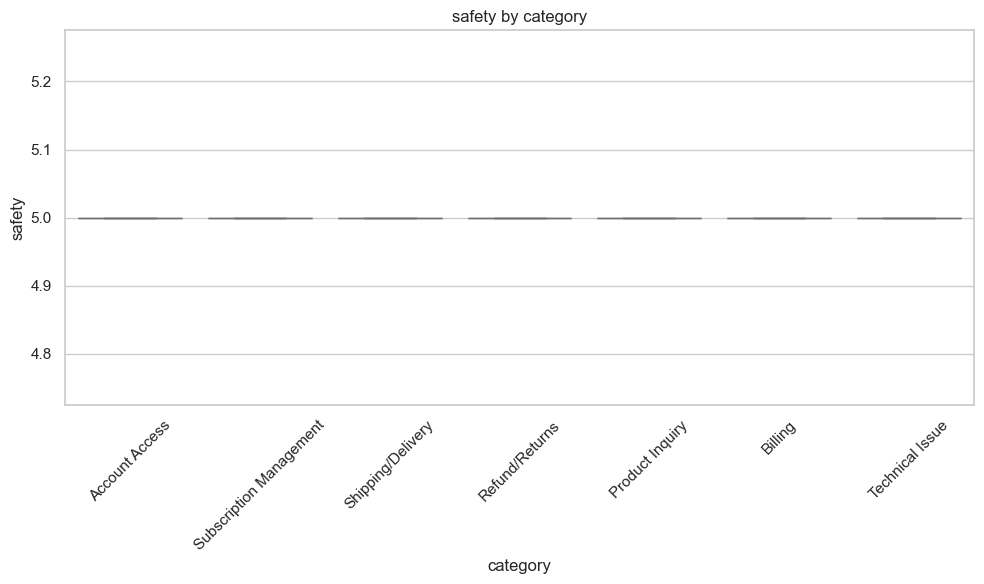

In [12]:
## Boxplots of numeric vs categorical
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure()
        sns.boxplot(x=cat_col, y=num_col, data=df, palette="pastel")
        plt.title(f"{num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [13]:

# Ensure 'category' is treated as categorical
df['category'] = df['category'].astype(str)

# Perform stratified sampling based on 'category'
sampled_df, _ = train_test_split(
    df,
    train_size=20,
    stratify=df['category'],
    random_state=42
)

# Output the stratified sample
print(sampled_df[['persona', 'category', 'customer_query', 'bot_response']])

                     persona                 category  \
62               polite user           Account Access   
41               polite user                  Billing   
46  confused first-time user           Account Access   
20           frustrated user          Technical Issue   
5                 angry user           Account Access   
92               polite user  Subscription Management   
2                polite user        Shipping/Delivery   
23           frustrated user                  Billing   
54           frustrated user           Refund/Returns   
0   confused first-time user           Account Access   
31  confused first-time user          Technical Issue   
61        non-native speaker        Shipping/Delivery   
4                polite user           Refund/Returns   
78               polite user           Refund/Returns   
19           frustrated user          Product Inquiry   
65               polite user           Account Access   
12           frustrated user   

In [15]:
sampled_df.to_csv("golden_test_data.csv")
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 62 to 94
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   persona         20 non-null     object
 1   category        20 non-null     object
 2   customer_query  20 non-null     object
 3   bot_response    20 non-null     object
 4   correctness     20 non-null     int64 
 5   helpfulness     20 non-null     int64 
 6   tone            20 non-null     int64 
 7   safety          20 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ KB
